In [13]:
import glob
import os
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

PARENT_DIR = "/Users/mbare/Documents/audana-dataset/dataset/Audio/"
SUB_DIRS = ["Truthful","Deceptive"]

In [14]:
def fex(file_name):
    X, sample_rate = librosa.load(file_name)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
                                              sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz


def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, 
                                         sub_dir, 
                                         file_ext)):
            try:
                print ("FEX : ",fn)
                mfccs, chroma, mel, contrast, tonnetz = fex(fn)
            except Exception as e:
              print ("Error encountered while parsing file: %s", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, [1 if sub_dir=="Deceptive" else 0])
    return np.array(features), np.array(labels, dtype = np.int)

FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_001.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_015.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_029.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_0.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_028.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_016.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_002.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_003.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_017.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_013.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Truthful/trial_truth_007.wav
FEX :  /Users/mbare/Documents/auda

FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_056.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_042.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_046.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_052.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_053.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_047.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_051.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_045.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_050.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_037.wav
FEX :  /Users/mbare/Documents/audana-dataset/dataset/Audio/Deceptive/trial_lie_023.wav
FEX :  /Users/mbare/Documents/audana-datase

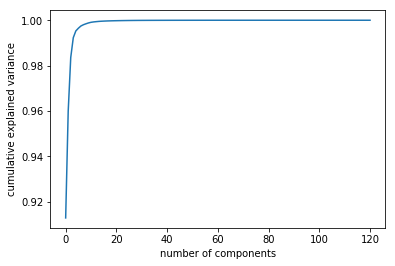

In [15]:
features, labels = parse_audio_files(PARENT_DIR, SUB_DIRS)

(121, 193)


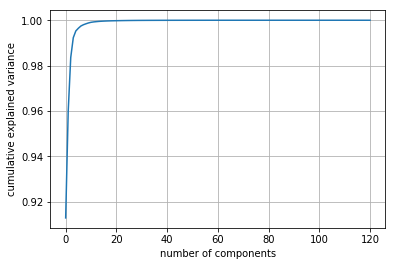

In [68]:
from sklearn.decomposition import PCA

print(features.shape)
pca = PCA()
pca.fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid(True)

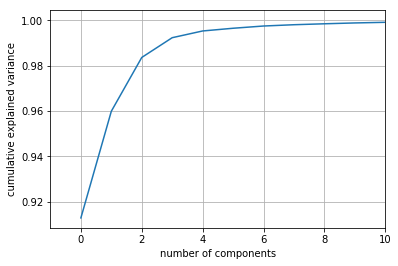

In [63]:
xmin = -1
xmax = 10
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(xmin,xmax)
plt.grid(True)

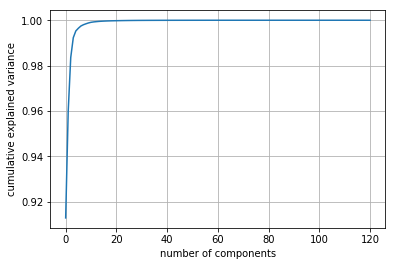

In [69]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA()
kpca_transform = kpca.fit_transform(features)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)

In [70]:
kpca_transform.shape

(121, 121)

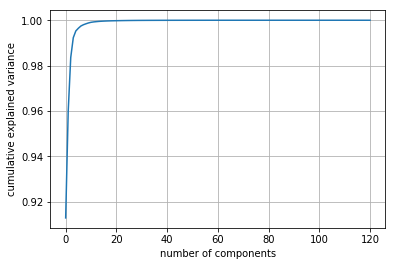

In [74]:
pca2 = PCA()
pca2.fit(kpca_transform)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid(True)

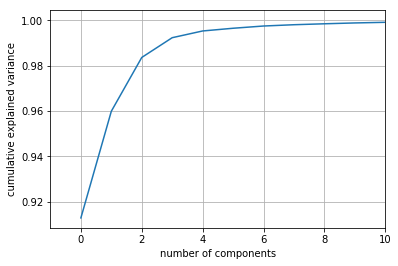

In [75]:
xmin = -1
xmax = 10
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xlim(xmin,xmax)
plt.grid(True)